In [110]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import datetime
import functools
import json
import os
import time
from tensorflow.keras import mixed_precision
from typing import Tuple, Optional

In [111]:
import consts 
import utils

In [132]:
# Load dataset
train_data, test_data, info = load(DATASET_NAME, DATASET_PATH)

Finished load() in 0.0551 secs


In [133]:
# Exploring features and classes
features = info.features
class_names = info.features["label"].names
size = info.dataset_size

In [140]:
print(f"FEATURES: \n\n {features} \n")
print(f"----------------------------")
print(f"CLASSES: \n\n {class_names} \n")
print(f"----------------------------")
print(f"DATASET SIZE: {size} images \n")

FEATURES: 

 FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
}) 

----------------------------
CLASSES: 

 ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 

In [115]:
# Exploring dataset
info.description

"This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels."

2024-07-06 16:21:27.407247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


{'shape': TensorShape([512, 512, 3]),
 'tensor': <tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[239, 217, 157],
         [244, 222, 162],
         [247, 227, 168],
         ...,
         [119, 104,  73],
         [111,  95,  70],
         [105,  89,  66]],
 
        [[233, 212, 149],
         [239, 218, 155],
         [243, 223, 162],
         ...,
         [117, 102,  71],
         [108,  92,  67],
         [101,  85,  62]],
 
        [[227, 206, 139],
         [234, 213, 146],
         [238, 219, 153],
         ...,
         [117, 100,  70],
         [108,  91,  65],
         [101,  83,  59]],
 
        ...,
 
        [[ 35,   7,  19],
         [ 35,   7,  19],
         [ 36,   8,  20],
         ...,
         [198, 181, 127],
         [196, 179, 125],
         [193, 176, 122]],
 
        [[ 34,   6,  18],
         [ 34,   6,  18],
         [ 35,   7,  19],
         ...,
         [200, 183, 129],
         [201, 184, 130],
         [198, 181, 127]],
 
        [[ 33,   5

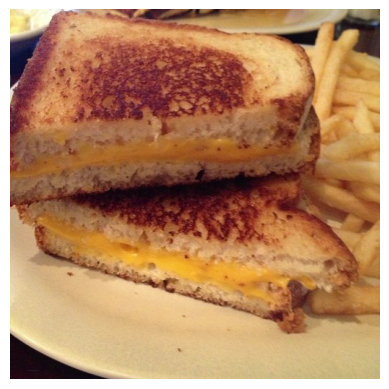

In [117]:
# Random image
random_sample(train_data, info)

In [ ]:
def base_model():
    base_model = tf.keras.Sequential()
    base_model.add(tf.keras.layers.Rescaling(1.0/255))
    base_model.add(tf.keras.layers.Conv2D(32, 3))
    base_model.add(tf.keras.layers.Flatten())

In [ ]:
def resnet():
  def __init__(self, train_data, test_data):
    mixed_precision.set_global_policy("mixed_float16")
    self.mixed_precision_policy = mixed_precision.global_policy()
    self.train_data = train_data
    self.test_data = test_data
    self.checkpoint_path = "model_checkpoints/cp.ckpt"
    self.weights = "imagenet"
    self.base_model = tf.keras.applications.ResNet101(include_top=False, weights=self.weights)
    self.base_model_trainable = False
    self.last_trainable_layers = 5

  def freeze_base_model_layers(self, verbose=True):
    """
    Freezes all layers, except n last layers
    """
    for layer in self.base_model.layers:
        layer.trainable = self.base_model_trainable

    for layer in self.base_model.layers[-self.last_trainable_layers:]:
        layer.trainable = True

    if verbose:
      for layer, enum in enumerate(self.base_model.layers):
          print(enum, layer.name, layer.trainable, layer.dtype, layer.dty)

  def create_model(self):
    self.freeze_base_model_layers(verbose=False)

    inputs = tf.keras.layers.Input(shape=data.image_shape, name="input_layer")
    x = self.base_model(inputs)
    x = tf.keras.layers.Rescaling(1.0/255)(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x),
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(len(data.class_names))(x)
    outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)

    self.model = tf.keras.Model(inputs, outputs)


    self.model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

    def train(self):
      self.model.fit(self.train_data,
                     validation_data=self.test_data
                     )

In [ ]:
data.prepare_dataset()

In [ ]:
training = Training(data.train_data, data.test_data)
training.create_model()
training.model.summary()